# OBJECTIVES
1) Build a model that will predict the price of a house based on features provided in the dataset.

2) Explore the characteristics of the houses using some business intelligence tools. 

3) One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

# 1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

#import pymysql
#import sqlalchemy
#import imblearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression as Lin
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#from collections import Counter 
#from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 2. uploading data

In [4]:
df_raw = pd.read_csv('regression_data_trans.csv')

In [5]:
df_raw #check if the data were imported correctly

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


# 3. Data cleaning / EDA  

Columns' names standardization was not run because the names are already standardized

## 3.1 Check for nulls and duplicates

In [6]:
df_raw.shape #checking number of columns and rows

(21597, 21)

In [7]:
df_raw.info() #checking the type of each variable and nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [8]:
df_raw.duplicated().sum() #checking for duplicates

0

## 3.2 Set the baseline model

In [9]:
y = df_raw['price'] #set y
X = df_raw.drop(['price','date', 'id'], axis = 1) #set X - drop date since it cannot be converted in a float
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=35) # split the data into TT

In [11]:
# define the model
linreg=Lin()

# train the model on train
#LinReg_base = linreg().fit(X_train,y_train)
LinReg_base = linreg.fit(X_train,y_train)

In [12]:
# predicting y with X_test
y_pred=LinReg_base.predict(X_test) 

In [13]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

In [14]:
r2 = r2(y_test,y_pred) # calculating r2 
mean_stand_err = mse(y_test,y_pred) # calculating mean standard error
mean_abs_err = mae(y_test,y_pred) # calculating absolute error
explained_variance=evs(y_test, y_pred)

print('r2: ', round(r2,4))
print('MAE: ', round(mean_abs_err,4))
print('MSE: ', round(mean_stand_err,4))
print('RMSE: ', round(np.sqrt(mean_stand_err),4))

r2:  0.6908
MAE:  126598.3022
MSE:  49863786258.1568
RMSE:  223302.0068


The metrics of the basic model are the following:
- r2:  0.6908
- MAE:  126598.3022
- MSE:  49863786258.1568
- RMSE:  223302.0068

# 4. Pre-processing

## 4.1 Dropping wrongly entered datapoints
In data exploration with sql and tableau a clear wrong data (bedrooms = 33) was detected. We are gonna drop this case before running the baseline model.

In [15]:
df_raw = df_raw[df_raw['bedrooms']!=33]

In [16]:
df_raw.reset_index(drop=True, inplace=True) #after dropping a case, reset index

In [17]:
df_raw.shape

(21596, 21)

## 4.2 Checking for id duplicates

In [18]:
df_raw['id'].duplicated().sum() #we found 177 duplicates because some houses were sold multiple times

177

In [19]:
#keep only the last (in time) sale for houses sold more than once
df_sort = df_raw.sort_values(by='date', ascending=False) #sort dataframe by date

In [20]:
df_sort.reset_index(drop=True, inplace=True) #after sorting, reset index

In [21]:
df_sort[df_sort['id'].duplicated(keep=False)] #see id duplicates

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
26,8062900070,9/9/2014,5,1.50,2550,6300,1.0,0,0,4,...,1560,990,1959,0,98056,47.5014,-122.172,1380,6300,272000
64,7227800055,9/9/2014,4,2.00,1750,8116,1.0,0,0,4,...,1750,0,1943,0,98056,47.5097,-122.181,1440,7865,199500
179,1450100390,9/5/2014,3,1.00,920,7314,1.0,0,0,3,...,920,0,1960,0,98002,47.2892,-122.220,1010,7420,125000
206,7520000520,9/5/2014,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
213,1545800290,9/5/2014,4,2.50,1700,6675,2.0,0,0,3,...,1700,0,1997,0,98038,47.3638,-122.053,1570,7540,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21478,251300110,1/14/2015,3,2.25,2510,12013,2.0,0,0,3,...,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000
21505,1523049207,1/14/2015,4,2.00,1700,8043,1.0,0,0,3,...,850,850,1954,0,98168,47.4758,-122.288,1540,13260,220000
21507,1446403850,1/14/2015,2,1.00,790,7153,1.0,0,0,4,...,790,0,1944,0,98168,47.4869,-122.324,810,7128,212000
21551,2767603612,1/13/2015,2,2.25,1290,1334,3.0,0,0,3,...,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,489000


In [22]:
df_sort = df_sort.drop_duplicates(subset=['id'], keep='last') #drop duplicates, keep the last

In [23]:
df_sort.reset_index(drop=True, inplace=True) #after dropping duplicates, reset index

## 4.3 Created dummy variables 

For this first model, we have decided to create a dummy variable for the year of renovation only, since, according to our tableau inspection, it seems to have a bigger impact than other variables which will "dummify" in the second model.

In [24]:
def dummi_renovation(x): #dummify years of renovation
    if x == 0:
        return 0
    else:
        return 1

In [25]:
#For the first model we decided to dummify only the yr_renovated variable.
df_sort['dummy_renovated']=list(map(dummi_renovation,df_sort['yr_renovated']))

## 4.4 Variables transformation
To make variables' values meaningful for the model, we carried out these transformations:

- We transformed the yr_built in age of the building so that the variable could be included in the model
- we transformed the zipcode in distance (km) from the most expensive area so that the variable could be included in the model. As a consequence we dropped long and lat.

In [26]:
df_sort['age'] = 2015 - df_sort['yr_built'] #calculating age of the houses

In [27]:
import pgeocode

In [28]:
#transforming zipcodes in distances (km)
dist = pgeocode.GeoDistance('us') # convert zipcode into distance (km) from the most expensive area
dist.query_postal_code(["98039"], ["98178", "98125", "98028", "98136", "98074", "98053", "98003", "98198", "98146",
       "98038", "98007", "98115", "98107", "98126", "98019", "98103", "98002", "98133",
       "98040", "98092", "98030", "98119", "98112", "98052", "98027", "98117", "98058",
       "98001", "98056", "98166", "98023", "98070", "98148", "98105", "98042", "98008",
       "98059", "98122", "98144", "98004", "98005", "98034", "98075", "98116", "98010",
       "98118", "98199", "98032", "98045", "98102", "98077", "98108", "98168", "98177",
       "98065", "98029", "98006", "98109", "98022", "98033", "98155", "98024", "98011",
       "98031", "98106", "98072", "98188", "98014", "98055"])

array([14.95955013, 11.31034025, 14.20633735, 15.21198963, 13.88018804,
       14.60440525, 34.62250281, 26.72999072, 17.15291398, 29.95532318,
        6.73863758,  8.09863549, 11.86982419, 14.06186439, 24.59997906,
        9.79814499, 35.84182139, 14.89010694,  7.40972594, 38.95281892,
       26.76450901, 10.03338435,  4.9437589 ,  9.51940184, 21.9449619 ,
       12.82005526, 21.68705801, 35.34082581, 13.8077469 , 21.57428254,
       36.52063017, 28.38299932, 21.50427384,  6.67188673, 29.96765062,
        8.80258918, 16.02121957,  5.81580315,  6.99720236,  2.21282454,
        5.05542891, 10.54579492, 15.45615336, 13.46684895, 38.98180523,
       10.0748832 , 12.60015407, 28.01615096, 39.3759467 ,  6.72448023,
       19.08828448, 11.31205231, 16.2142098 , 16.82044655, 32.5351388 ,
       18.56920746,  9.25723786,  8.74222794, 42.8038729 ,  6.55328258,
       15.24303078, 26.44713781, 13.70395789, 26.71901157, 13.83199865,
       17.56391332, 20.10463946, 24.03260796, 18.11376677])

In [29]:
#setting dic values and keys
keys = (98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039)
values = (14.95955013, 11.31034025, 14.20633735, 15.21198963, 13.88018804,
       14.60440525, 34.62250281, 26.72999072, 17.15291398, 29.95532318,
        6.73863758,  8.09863549, 11.86982419, 14.06186439, 24.59997906,
        9.79814499, 35.84182139, 14.89010694,  7.40972594, 38.95281892,
       26.76450901, 10.03338435,  4.9437589 ,  9.51940184, 21.9449619 ,
       12.82005526, 21.68705801, 35.34082581, 13.8077469 , 21.57428254,
       36.52063017, 28.38299932, 21.50427384,  6.67188673, 29.96765062,
        8.80258918, 16.02121957,  5.81580315,  6.99720236,  2.21282454,
        5.05542891, 10.54579492, 15.45615336, 13.46684895, 38.98180523,
       10.0748832 , 12.60015407, 28.01615096, 39.3759467 ,  6.72448023,
       19.08828448, 11.31205231, 16.2142098 , 16.82044655, 32.5351388 ,
       18.56920746,  9.25723786,  8.74222794, 42.8038729 ,  6.55328258,
       15.24303078, 26.44713781, 13.70395789, 26.71901157, 13.83199865,
       17.56391332, 20.10463946, 24.03260796, 18.11376677, 0)

zipcode_dist = dict(zip(keys, values))

In [30]:
df_sort['zipcode_dist'] = df_sort['zipcode'].map(zipcode_dist)

# 4.5 scaling

In [31]:
scaler = MinMaxScaler()

In [32]:
X_temp = df_sort[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                  'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15', 'age','dummy_renovated', 'zipcode_dist']]

In [33]:
X1_scaled=scaler.fit_transform(X_temp)

In [34]:
X1_scaled_df=pd.DataFrame(X1_scaled, columns=X_temp.columns)

In [35]:
X1_scaled_df.describe() #to check if the scaling worked

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,dummy_renovated,zipcode_dist
count,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,0.237257,0.215793,0.130080,0.008849,0.198403,0.007610,0.058780,0.602678,0.466282,0.157213,0.060570,0.273518,0.013928,0.381790,0.042486,0.404471
std,0.090301,0.102498,0.069766,0.025158,0.216033,0.086905,0.191795,0.162490,0.117199,0.091670,0.091884,0.117973,0.031413,0.255542,0.201699,0.225704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.166667,0.080486,0.002738,0.000000,0.000000,0.000000,0.500000,0.400000,0.091814,0.000000,0.187747,0.005111,0.156522,0.000000,0.234404
50%,0.200000,0.233333,0.117692,0.004297,0.200000,0.000000,0.000000,0.500000,0.400000,0.131637,0.000000,0.247978,0.008005,0.347826,0.000000,0.341194
75%,0.300000,0.266667,0.165528,0.006162,0.400000,0.000000,0.000000,0.750000,0.500000,0.204646,0.116183,0.339184,0.010839,0.547826,0.000000,0.512686
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Model improvement / iterations

## 5.1 Run model 1

In [36]:
y1 = df_sort['price'] #set y
X1 = X1_scaled_df #set X

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=35)# split the data into TT

In [38]:
# define the model
linreg=Lin()

# train the model on train
model1 = linreg.fit(X1_train,y1_train)

In [39]:
y1_pred=model1.predict(X1_test) # predicting y with X_test

### 5.1.2 Evaluating model 1

In [40]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

In [41]:
r2_1 = r2(y1_test,y1_pred) # calculating r2 
mean_stand_err1 = mse(y1_test,y1_pred) # calculating mean standard error
mean_abs_err1 = mae(y1_test,y1_pred) # calculating absolute error
explained_variance1=evs(y1_test, y1_pred)

In [42]:
print('r2: ', round(r2_1,4))
print('MAE: ', round(mean_abs_err1,4))
print('MSE: ', round(mean_stand_err1,4))
print('RMSE: ', round(np.sqrt(mean_stand_err1),4))

r2:  0.7362
MAE:  120173.7715
MSE:  34687770226.783
RMSE:  186246.5308


Metrics model 1:
- r2:  0.7362
- MAE:  120173.7715
- MSE:  34687770226.783
- RMSE:  186246.5308

Model 1 improved the baseline model.
When predicting house prices, an absolute mean error of around 120000$ can occurr.

## 5.2 Features engineering to improve model 1

- Based on the definition of the variables, we have decided to drop sqft_living15, sqft_lot15

### 5.2.1 Check the multicollinearity

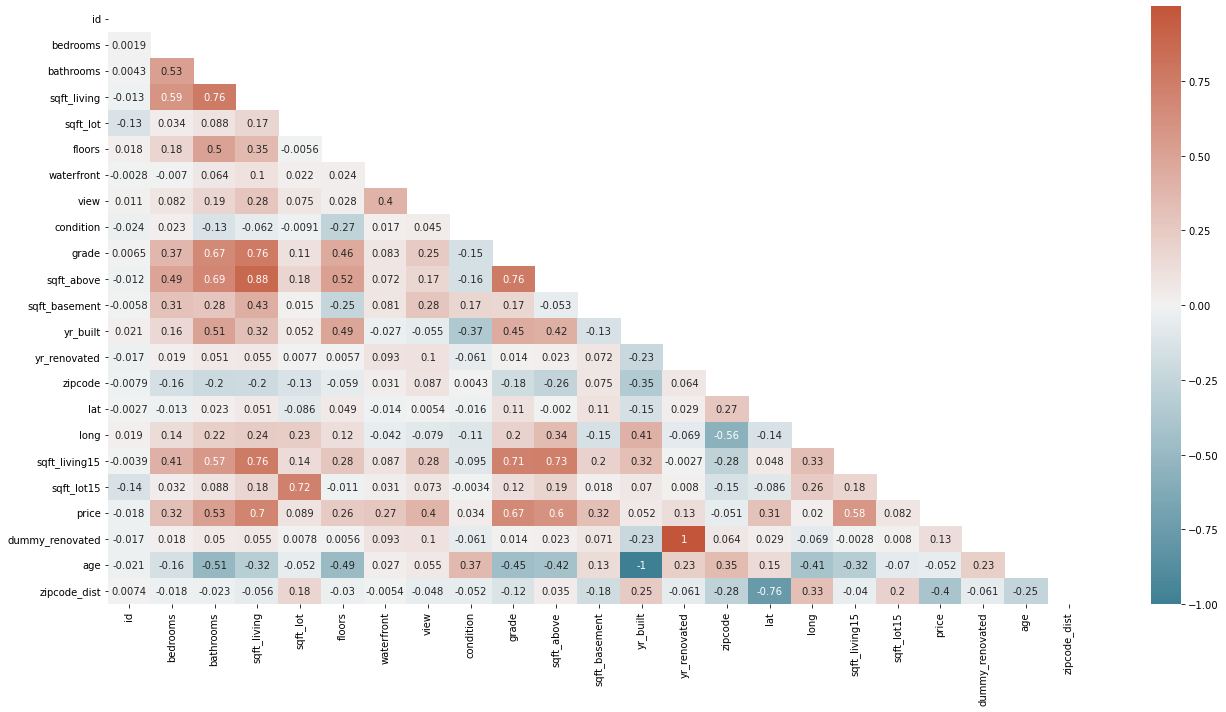

In [43]:
#create a heatmap
cm=df_sort.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(22,11))
ax=sns.heatmap(cm, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True));

Based on the high correlation between sqft_living and sqft_above, we have decided to drop sqft_above which is the variable with the lower correlation with price

### 5.2.2 Scaling for model 2

## 5.3 Run model 2

In [44]:
y2 = df_sort['price'] #set y
X2 = X1_scaled_df.drop(['sqft_living15', 'sqft_lot15', 'sqft_above'], axis=1) #set X

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30,random_state=35)# split the data into TT

# define the model
linreg=Lin()

# train the model on train
model2 = linreg.fit(X2_train,y2_train)

In [46]:
y2_pred=model2.predict(X2_test) # predicting y with X_test

### 5.3.1 Evaluate model 2

In [47]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

r2_2 = r2(y2_test,y2_pred) # calculating r2 
mean_stand_err2 = mse(y2_test,y2_pred) # calculating mean standard error
mean_abs_err2 = mae(y2_test,y2_pred) # calculating absolute error
explained_variance2=evs(y2_test, y2_pred)

print('r2: ', round(r2_2,4))
print('MAE: ', round(mean_abs_err2,4))
print('MSE: ', round(mean_stand_err2,4))
print('RMSE: ', round(np.sqrt(mean_stand_err2),4))

r2:  0.7358
MAE:  120304.2015
MSE:  34739957365.1094
RMSE:  186386.5804


Metrics model 1
- r2:  0.7362
- MAE:  120173.7715
- MSE:  34687770226.783
- RMSE:  186246.5308

Metrics model 2
- r2:  0.7358
- MAE:  120304.2015
- MSE:  34739957365.1094
- RMSE:  186386.5804

The changes made had a minimal impact to the model, so we will continue with trying to improve it. 

## 5.4 Improving model 2

### 5.4.1 Checking for outliers

In [48]:
df_mod3 = df_sort[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
                   'grade','sqft_basement', 'age','dummy_renovated', 'zipcode_dist']]

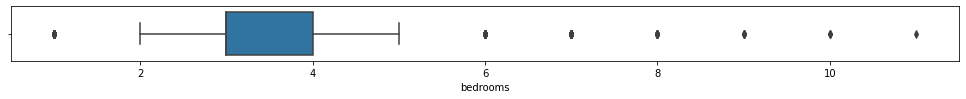

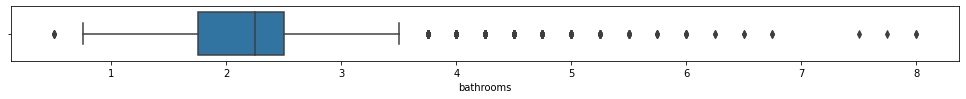

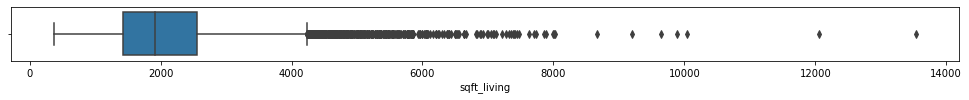

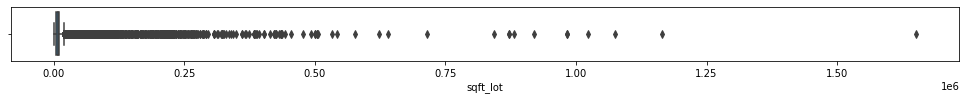

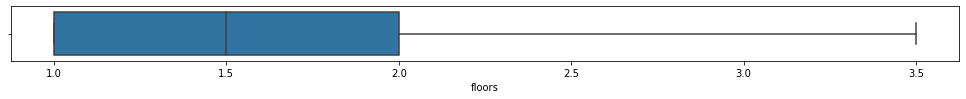

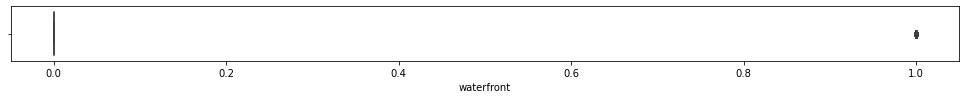

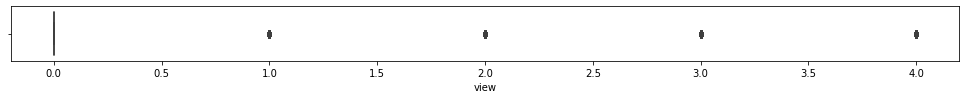

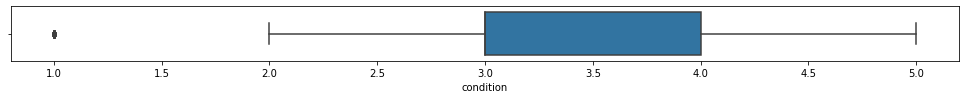

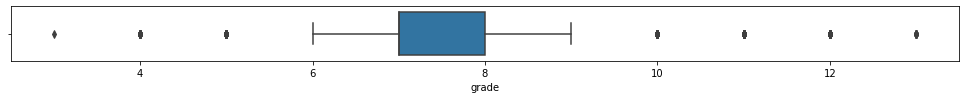

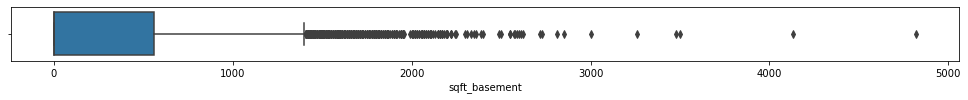

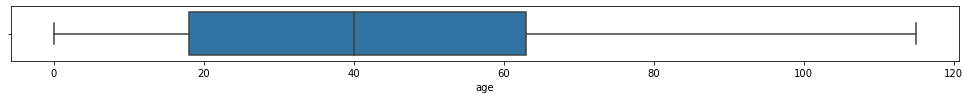

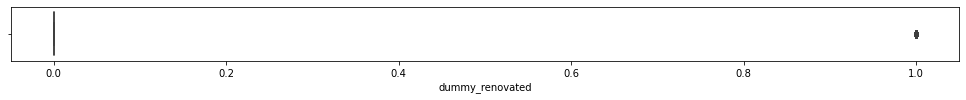

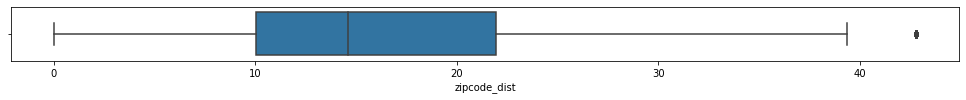

In [49]:
for column in df_mod3:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_mod3, x=column)

### 5.4.2 Checking for distributions

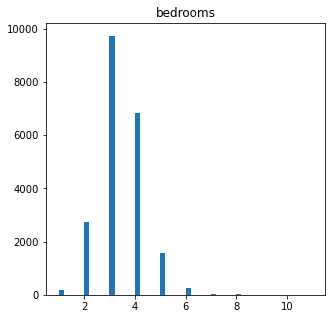

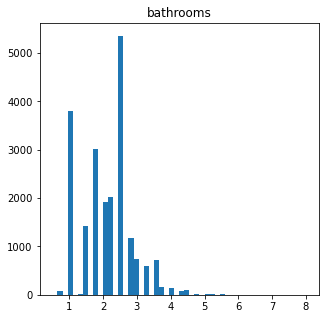

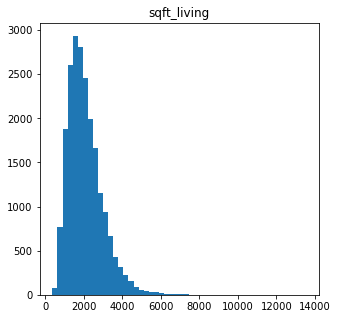

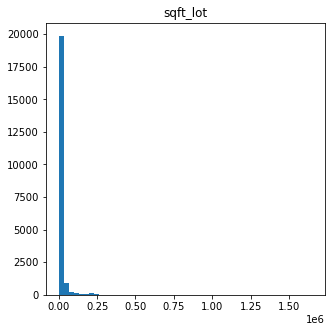

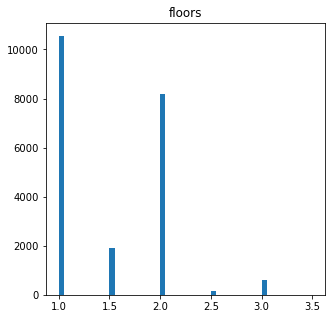

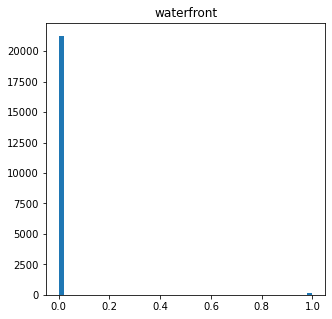

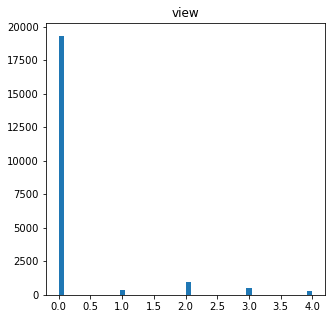

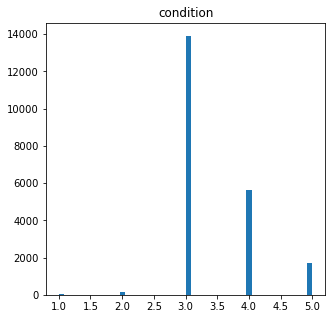

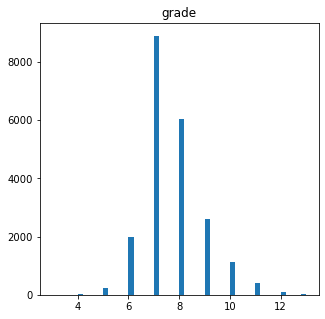

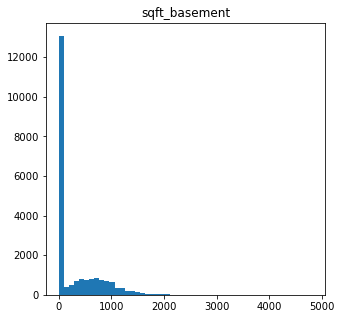

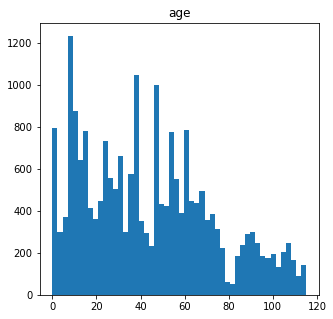

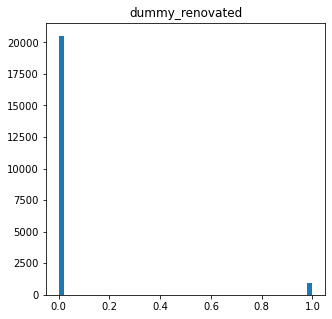

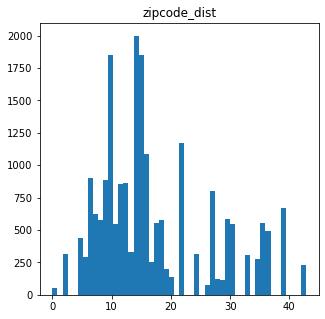

In [50]:
for column in df_mod3:
    plt.figure(figsize=(5,5))
    plt.hist(data=df_mod3, bins = 50, x=column)
    plt.title(column)

Based on the boxplots and the histograms, we made the following considerations:
- view: dummify in 1 with view and 0 no view 
- condition: group 1 and 2, and then dummify 
- sqft_basement: dummify in 1 with basement and 0 no basement 

In [51]:
def dummify(x): #create dummify function
    if x == 0:
        return 0
    else:
        return 1

In [52]:
df_mod3['view_dummy']=list(map(dummify,df_mod3['view'])) # dummify view

In [53]:
df_mod3.drop(['view'], axis = 1, inplace=True) #drop original column

In [54]:
df_mod3['condition'] = df_mod3['condition'].replace(1,2) #grouping condition 1 and 2 in one category

In [55]:
df_dummy=pd.get_dummies(df_mod3['condition']) #creating dummy condition

In [56]:
df_mod3=pd.concat([df_mod3,df_dummy],axis=1)

In [57]:
df_mod3.rename(columns={2: 'cond2', 3: 'cond3', 4: 'cond4', 5: 'cond5'},inplace=True, errors='raise')

In [58]:
df_mod3.drop(['condition'], axis = 1, inplace=True) #drop original column

In [59]:
df_mod3['basement_dummy']=list(map(dummify,df_mod3['sqft_basement'])) #dummify basement

In [60]:
df_mod3.drop(['sqft_basement'], axis = 1, inplace=True) #drop original column

### 5.4.3 Scaling for model 3

In [61]:
scaler = MinMaxScaler()

X3_temp = df_mod3

X3_scaled=scaler.fit_transform(X3_temp)

X3_scaled_df=pd.DataFrame(X3_scaled, columns=X3_temp.columns)

X3_scaled_df.describe() #to check if the scaling worked

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,age,dummy_renovated,zipcode_dist,view_dummy,cond2,cond3,cond4,cond5,basement_dummy
count,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,0.237257,0.215793,0.130080,0.008849,0.198403,0.007610,0.466282,0.381790,0.042486,0.404471,0.098697,0.008871,0.648957,0.263458,0.078715,0.393109
std,0.090301,0.102498,0.069766,0.025158,0.216033,0.086905,0.117199,0.255542,0.201699,0.225704,0.298262,0.093768,0.477308,0.440519,0.269300,0.488452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.166667,0.080486,0.002738,0.000000,0.000000,0.400000,0.156522,0.000000,0.234404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.233333,0.117692,0.004297,0.200000,0.000000,0.400000,0.347826,0.000000,0.341194,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.300000,0.266667,0.165528,0.006162,0.400000,0.000000,0.500000,0.547826,0.000000,0.512686,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.5 Run model 3

In [62]:
y3 = df_sort['price'] #set y

X3 = X3_scaled_df #set x

In [63]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30,random_state=35)# split the data into TT

In [64]:
# define the model
linreg=Lin()

# train the model on train
model3 = linreg.fit(X3_train,y3_train)

y3_pred=model3.predict(X3_test) # predicting y with X_test

### 5.5.1 Evaluate model 3

In [65]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

In [66]:
r2_3 = r2(y3_test,y3_pred) # calculating r2 
mean_stand_err3 = mse(y3_test,y3_pred) # calculating mean standard error
mean_abs_err3 = mae(y3_test,y3_pred) # calculating absolute error
explained_variance3=evs(y3_test, y3_pred)

print('r2: ', round(r2_3,4))
print('MAE: ', round(mean_abs_err3,4))
print('MSE: ', round(mean_stand_err3,4))
print('RMSE: ', round(np.sqrt(mean_stand_err3),4))

r2:  0.7343
MAE:  121130.2836
MSE:  34940888622.2333
RMSE:  186924.8208


###### Model1 metrics:
- r2:  0.7369
- MAE:  121173.2448
- MSE:  34138014997.1184
- RMSE:  184764.7558


###### Model2 metrics:
- r2:  0.7344
- MAE:  121658.2146
- MSE:  34456820064.3625
- RMSE:  185625.4833

##### Model3 metrics:
- r2:  0.7343
- MAE:  121130.2836
- MSE:  34940888622.2333
- RMSE:  186924.8208

Model 3 is comparable to model 1 and model 2.

## 5.6 Improving model 3

Considering the heatmap, we have decided to drop the coulmn age and the column sqft_lot because they have a correlation with price lower than 0.1.


## 5.7 Run model 4

In [67]:
y4 = df_sort['price'] #set y

X4 = X3_scaled_df.drop(['age','sqft_lot'], axis = 1) #set x

In [68]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30,random_state=35)# split the data into TT

In [69]:
# define the model
linreg=Lin()

# train the model on train
model4 = linreg.fit(X4_train,y4_train)

In [70]:
y4_pred=model4.predict(X4_test) # predicting y with X_test

### 5.7.1 Evaluate model 4

In [71]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

r2_4 = r2(y4_test,y4_pred) # calculating r2 
mean_stand_err4 = mse(y4_test,y4_pred) # calculating mean standard error
mean_abs_err4 = mae(y4_test,y4_pred) # calculating absolute error
explained_variance4=evs(y4_test, y4_pred)

print('r2: ', round(r2_4,4))
print('MAE: ', round(mean_abs_err4,4))
print('MSE: ', round(mean_stand_err4,4))
print('RMSE: ', round(np.sqrt(mean_abs_err4),4))

r2:  0.7234
MAE:  124634.8891
MSE:  36373233191.8988
RMSE:  353.0367


###### Model1 metrics:
- r2:  0.7369
- MAE:  121173.2448
- MSE:  34138014997.1184
- RMSE:  184764.7558


###### Model2 metrics:
- r2:  0.7344
- MAE:  121658.2146
- MSE:  34456820064.3625
- RMSE:  185625.4833

##### Model3 metrics:
- r2:  0.7343
- MAE:  121130.2836
- MSE:  34940888622.2333
- RMSE:  186924.8208
    
##### Model4 metrics:
- r2:  0.7234
- MAE:  124634.8891
- MSE:  36373233191.8988
- RMSE:  190717.6793

Model 4 slightly worsened with respect to model 1, 2 and 3. 
Model 4b: When reintroducing the variable sqft_lot only (thus only dropping age from model 3), the metrics are still slightly worse than the first 3 models:
- r2:  0.724
- MAE:  124299.1675
- MSE:  36296247765.068
- RMSE: 190515.7415), 

Model 4c: while when reintroducing the variable age (and dropping sqft_lot) the metrics are comparable to the first 3 models:
- r2: 0.7338
- MAE: 121454.3186
- MSE: 35003441781.8334 
- RMSE: 187092.0677

Thus, among all the regression models, we think that this last one, model 4c is the best model because has the same metrics as the the first 3, but less features, thus being more parsimonious. 

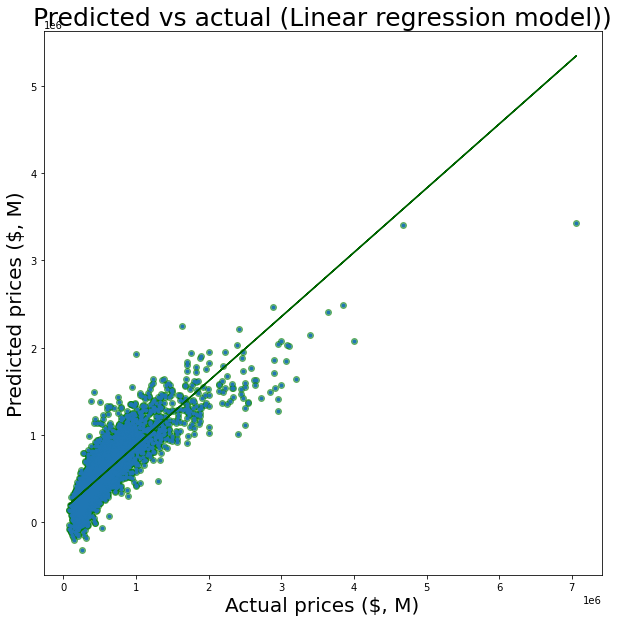

In [121]:
from numpy.polynomial.polynomial import polyfit
# representation of the predicted vs. actual prices according to model 4c
plt.figure(figsize=(10,10))
plt.scatter(y4_test, y4_pred, c = 'green', alpha=0.5)
plt.title('Predicted vs actual (Linear regression model))', fontsize = 25)
plt.xlabel('Actual prices ($, M)', fontsize = 20)
plt.ylabel('Predicted prices ($, M)', fontsize = 20)

b, m = polyfit(y4_test, y4_pred, 1)
plt.plot(y4_test, y4_pred, '.')
plt.plot(y4_test, b + m * y4_test, '-', c= 'darkgreen')
plt.show()

In [ ]:
plt.scatter(X_ax,y4_test, label = 'actual prices')
(X_ax,y4_pred, label = 'predicted prices')
plt.title('Actual vs predicted prices')

Despite several changes were made, the model didn't really improve after model 1, so we are now approacching the problem using another model, the decision tree regression model.

## 7. Decision-tree regression model

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

## 7.1 Baseline model with decision-tree

In [73]:
yt = df_raw['price'] #set y
Xt = df_raw.drop(['price','date', 'id'], axis = 1) #set X 

In [74]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.30,random_state=35)# split the data into TT

In [75]:
tmodel_base = DecisionTreeRegressor(random_state=0).fit(Xt_train, yt_train) #not setting the max_depth parameter for the base model

In [76]:
yt_pred=tmodel_base.predict(Xt_test)

### 7.1.1 Evaluate the model

In [77]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

r2_t = r2(yt_test,yt_pred) # calculating r2 
mean_stand_err_t = mse(yt_test,yt_pred) # calculating mean standard error
mean_abs_err_t = mae(yt_test,yt_pred) # calculating absolute error
explained_variancet=evs(yt_test, yt_pred)

print('r2: ', round(r2_t,4))
print('MAE: ', round(mean_abs_err_t,4))
print('MSE: ', round(mean_stand_err_t,4))
print('RMSE: ', round(np.sqrt(mean_stand_err_t),4))

r2:  0.736
MAE:  102218.3132
MSE:  42546512242.1678
RMSE:  206268.0592


In [78]:
#checking for overfitting
yt_pred_train=tmodel_base.predict(Xt_train)

In [79]:
r2_to = r2(yt_train,yt_pred_train) # calculating r2 
mean_stand_errto = mse(yt_train,yt_pred_train) # calculating mean standard error
mean_abs_errto = mae(yt_train,yt_pred_train) # calculating absolute error
explained_varianceto=evs(yt_train,yt_pred_train)

print('r2: ', round(r2_to,4))
print('MAE: ', round(mean_abs_errto,4))
print('MSE: ', round(mean_stand_errto,4))
print('RMSE: ', round(np.sqrt(mean_stand_errto),4))

r2:  0.9994
MAE:  788.949
MSE:  76700118.2928
RMSE:  8757.8604


Metrics of the base model for the test vs. the training:
Test:
- r2:  0.736
- MAE:  102218.3132
- MSE:  42546512242.1678
- RMSE:  206268.0592

Training:
- r2:  0.9994
- MAE:  788.949
- MSE:  76700118.2928
- RMSE:  8757.8604

The basic model is overfitting, so for model 1 we will include the max_depth.

## 7.2 improving basic model

Steps to take:
- we will include the max_depth based on the convergence of the accuracies between training and test
- we will use the dataframe of the best model emerged with linear regression, that is model3 (same metrics as model1 but less variables considered, so more parsimonius)

In [80]:
df_mod3.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'grade', 'age', 'dummy_renovated', 'zipcode_dist',
       'view_dummy', 'cond2', 'cond3', 'cond4', 'cond5', 'basement_dummy'],
      dtype='object')

In [81]:
yt1 = df_sort['price'] #set y

#Xt1 = X3_scaled_df #set x
Xt1 = df_mod3[['bedrooms', 'bathrooms', 'sqft_living','floors',
       'waterfront', 'grade', 'age', 'dummy_renovated', 'zipcode_dist',
       'view_dummy', 'cond2', 'cond3', 'cond4', 'cond5', 'basement_dummy']]

In [82]:
Xt1_train, Xt1_test, yt1_train, yt1_test = train_test_split(Xt1, yt1, test_size=0.30,random_state=35)# split the data into TT

In [83]:
#calculating the ideal tree depth
for max_d in range (1,35):
    mod_temp = DecisionTreeRegressor(random_state=0, max_depth=max_d)
    mod_temp.fit(Xt1_train,yt1_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), mod_temp.score(Xt1_train, yt1_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), mod_temp.score(Xt1_test,yt1_test))
    print('');

The Training Accuracy for max_depth 1 is: 0.3161738021242523
The Validation Accuracy for max_depth 1 is: 0.32655927609246416

The Training Accuracy for max_depth 2 is: 0.4885493634732311
The Validation Accuracy for max_depth 2 is: 0.48840968203227686

The Training Accuracy for max_depth 3 is: 0.6118386049928948
The Validation Accuracy for max_depth 3 is: 0.6094830653634893

The Training Accuracy for max_depth 4 is: 0.6985093604941988
The Validation Accuracy for max_depth 4 is: 0.703453979777509

The Training Accuracy for max_depth 5 is: 0.7580493110854913
The Validation Accuracy for max_depth 5 is: 0.7400666556901372

The Training Accuracy for max_depth 6 is: 0.800900324732207
The Validation Accuracy for max_depth 6 is: 0.7719634594277325

The Training Accuracy for max_depth 7 is: 0.8352987175962167
The Validation Accuracy for max_depth 7 is: 0.7976021548775821

The Training Accuracy for max_depth 8 is: 0.8639863846687789
The Validation Accuracy for max_depth 8 is: 0.804580464922794

T

According to the calculated accuracy the best max_depth for this model is 8.

## 7.3 Run tmodel 1 (t=tree)

In [84]:
# train the model
tmodel1 = DecisionTreeRegressor(random_state=0, max_depth = 8).fit(Xt1_train, yt1_train) #not setting the max_depth parameter for the base model

In [85]:
# predict y with X_test
yt1_pred=tmodel1.predict(Xt1_test)

### 7.3.1 Evaluate tmodel 1

In [86]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evs

r2_t1 = r2(yt1_test,yt1_pred) # calculating r2 
mean_stand_errt1 = mse(yt1_test,yt1_pred) # calculating mean standard error
mean_abs_errt1 = mae(yt1_test,yt1_pred) # calculating absolute error
explained_variancet1=evs(yt1_test, yt1_pred)

print('r2: ', round(r2_t1,4))
print('MAE: ', round(mean_abs_errt1,4))
print('MSE: ', round(mean_stand_errt1,4))
print('RMSE: ', round(np.sqrt(mean_stand_errt1),4))

r2:  0.8046
MAE:  99028.349
MSE:  25697817780.3283
RMSE:  160305.3891


In [129]:
#checking for overfitting
yt1_pred_train=tmodel1.predict(Xt1_train)

r2_to1 = r2(yt1_train,yt1_pred_train) # calculating r2 
mean_stand_errto1 = mse(yt1_train,yt1_pred_train) # calculating mean standard error
mean_abs_errto1 = mae(yt1_train,yt1_pred_train) # calculating absolute error
explained_varianceto1 =evs(yt1_train,yt1_pred_train)

print('r2: ', round(r2_to1,4))
print('MAE: ', round(mean_abs_errto1,4))
print('MSE: ', round(mean_stand_errto1,4))
print('RMSE: ', round(np.sqrt(mean_stand_errto1),4))

r2:  0.864
MAE:  89722.6932
MSE:  18601366614.3196
RMSE:  136386.8271


##### Metrics tmodel1
- r2:  0.8046
- MAE:  99028.349
- MSE:  25697817780.3283
- RMSE:  160305.3891

##### Metrics on training to check for overfitting
- r2:  0.864
- MAE:  89722.6932
- MSE:  18601366614.3196
- RMSE:  136386.8271

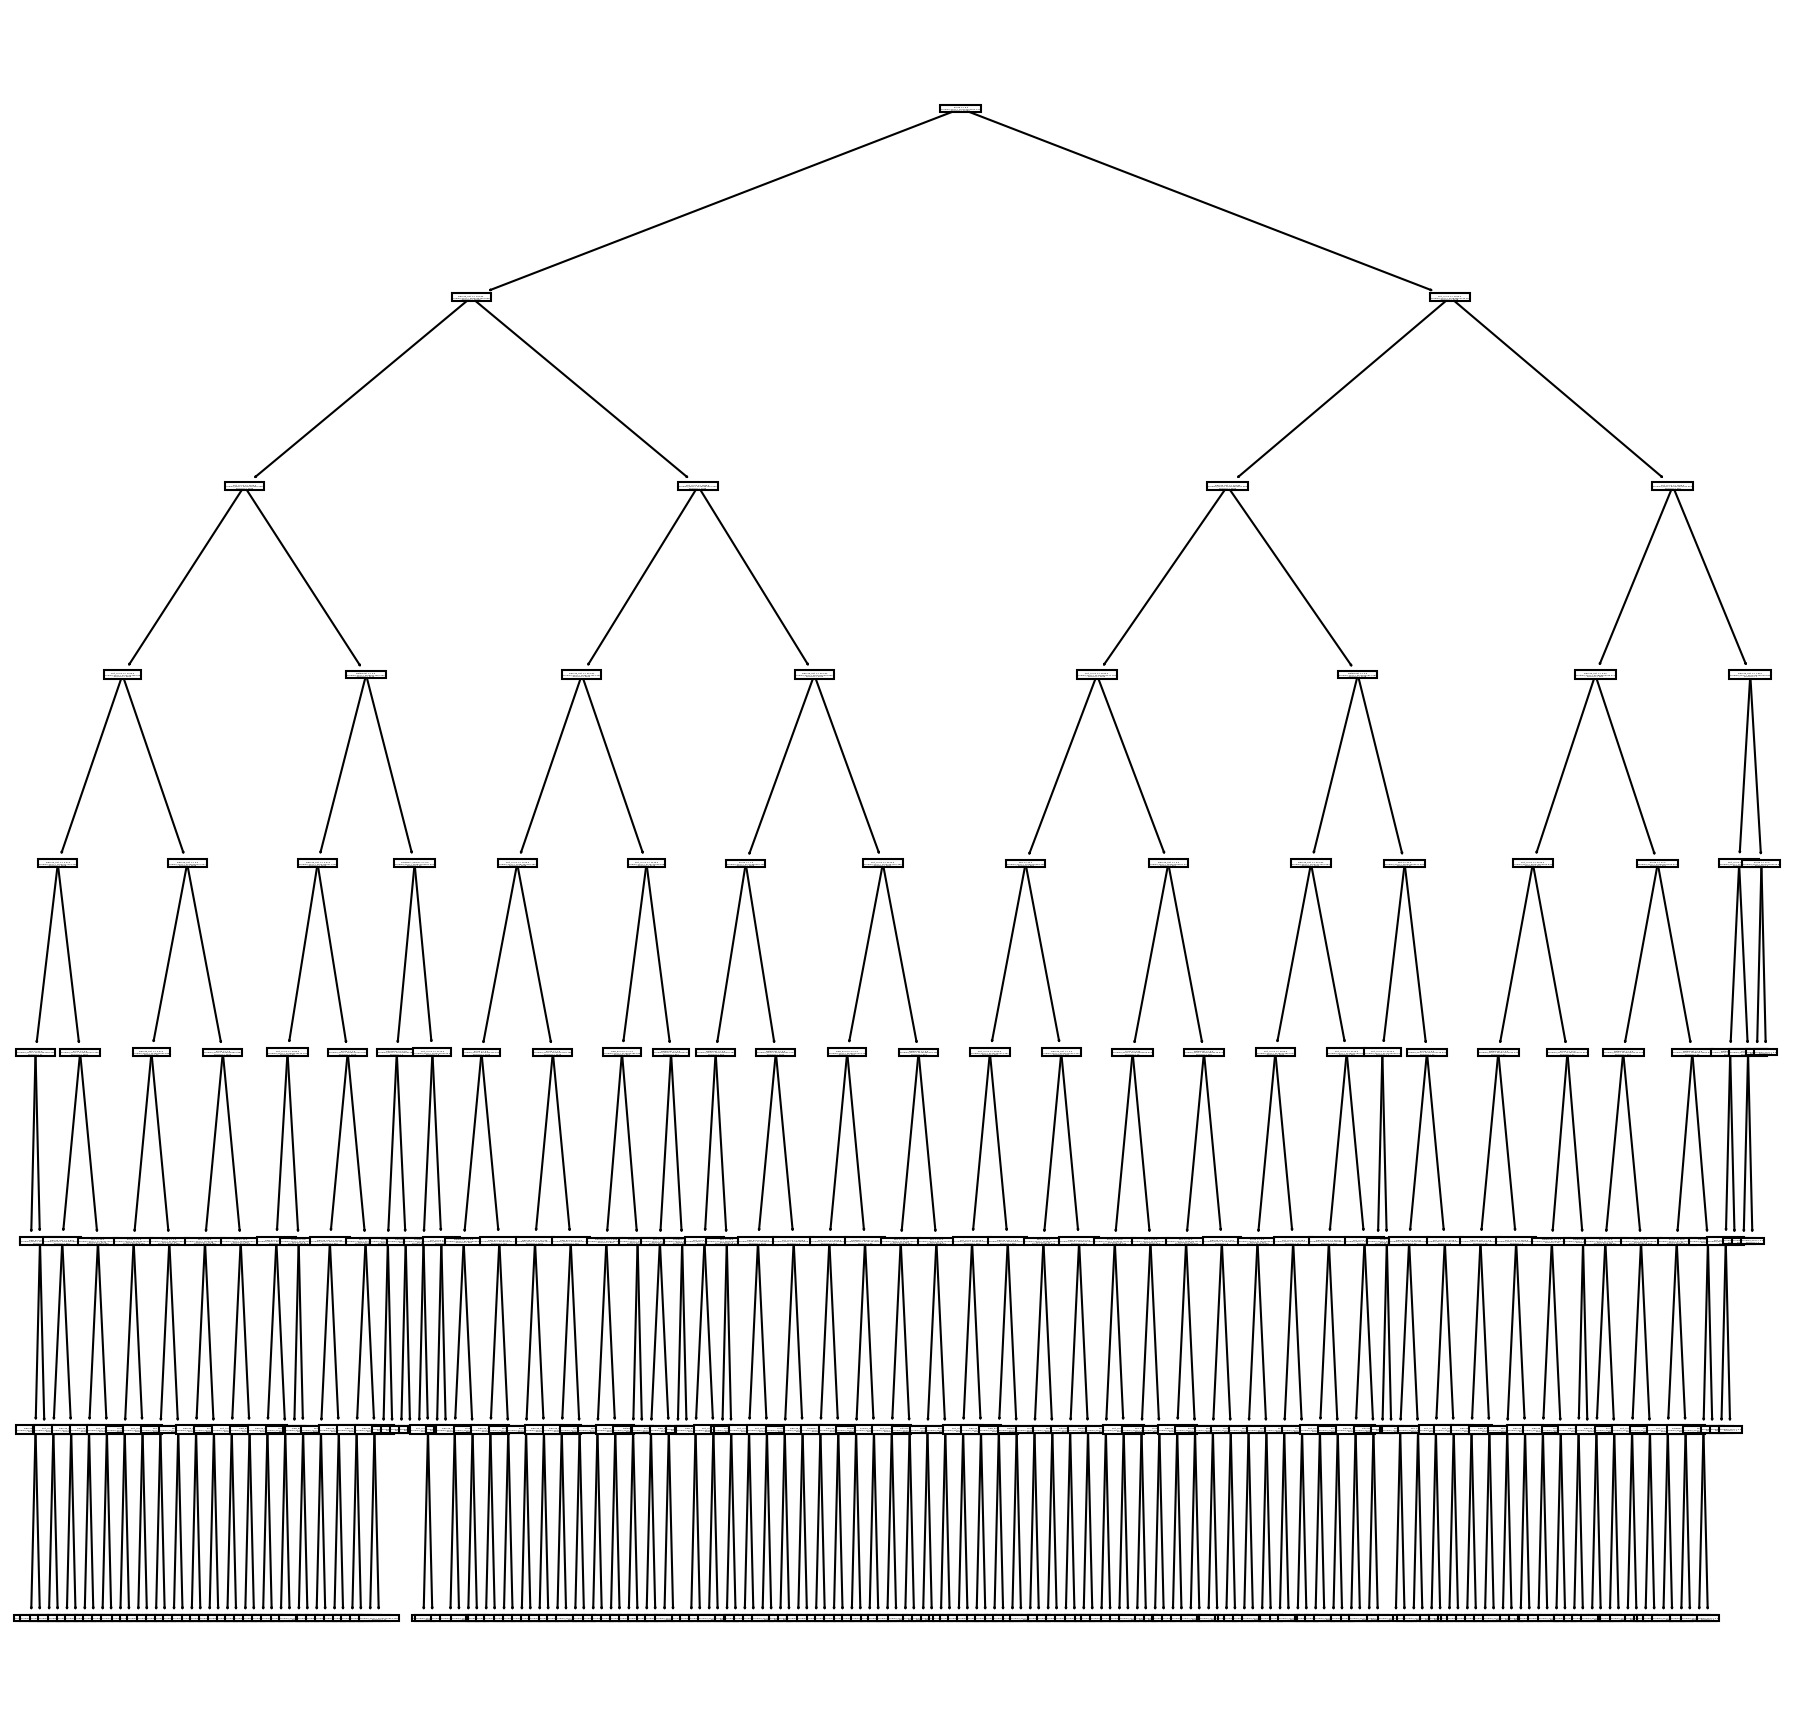

In [128]:
# visualizing the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15), dpi=150)
plot_tree(tmodel1, feature_names=Xt1.columns);

### OBJECTIVE 1: Build a model that will predict the price of a house based on features provided in the dataset.

Considering all the models computed so far, with both linear regression and decision tree regression, the best model to predict the price of a house is the tmodel1.

# 8. Investigating factors responsible for higher property value - $650K and above.

In [88]:
# create a database with properties of which the price is >$650K 
df_high = df_sort[df_sort['price'] >= 650000] #starting from the dataframw where the houses sold twice are already excluded

In [89]:
no_high = df_high['id'].count()
perc_high = (5301/22419)*100
print ('The number of properties sold for more than $650K are ' + str(no_high))

The number of properties sold for more than $650K are 5301


In [90]:
#create a df with only the numerical variables
df_high_num = df_high[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above','floors',
                       'condition', 'grade', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age','zipcode_dist']]

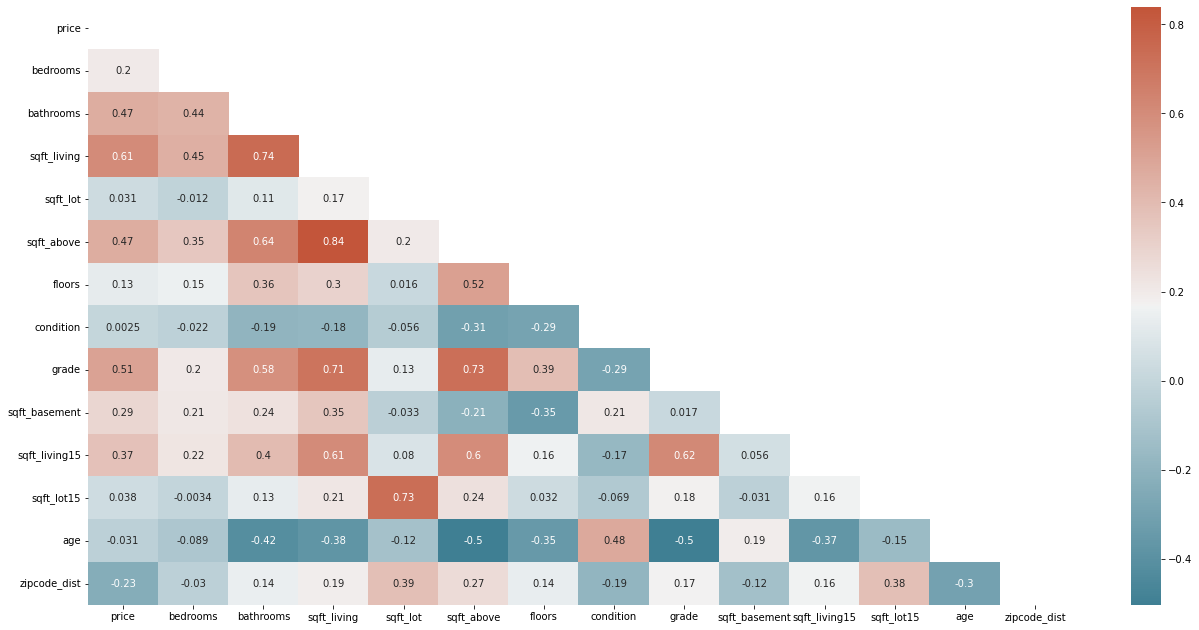

In [91]:
#create a heatmap to investigate the factors that have the highest correlations with price
cm=df_high_num.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(22,11))
ax=sns.heatmap(cm, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True));

### OBJECTIVE 2: Explore the characteristics of the houses using some business intelligence tools. 
    
See dashboards in Tableau. 

### OBJECTIVE 3: understanding which factors are responsible for higher property value - $650K and above

For higher value properties, the three factors showing the highest correlations with price are sqft of the living area, grade, number of bathrooms, and sqft of the above area.

For the categorical variables, see supplmental dashboard in tableau.